## Homework Assignment 2: Deep Learning Foundation

### Obbjectives:
- Practice creating sequential models with Keras
- Test different architectures: wide vs. deep models
- Learn how to use different techniques to overcome underfitting and overfitting

### Instructions:
- To help you solve this assignment, I have created a template of your solution. **You only need to fill in code in blank cells where you see comment "Add your code here " or "Write your analysis here"**
- I have given sample output for your reference. However, due to randomness during training, you'll get different result. You do all analysis based on your own output.
- Again, due to randomness, if you run your solution code multiple times, you may see different outputs. You only need to analyze your analysis from one run.

### Description:  Classifying newswires: a multi-class classification

- In this assignment, you will build a network to classify Reuters newswires into 46 different mutually-exclusive topics. 
- Since we have many classes and each data point should be classified into only one category, the problem is specifically an instance of <b>"single-label, multi-class classification"</b>. 

### The Reuters dataset

- _Reuters dataset_, is a set of short newswires and their topics, published by Reuters in 1986.  
- There are 46 different topics some topics are more represented than others, but each topic has at least 10 examples in the training set.
- The dataset can be loaded using the following script. Specifically, it retrieves 8,982 training examples and 2,246 test examples. The argument `num_words=10000` restricts the data to the 10,000 most frequently occurring words found in the data.


In [1]:
import keras
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# show the sizes training/testing samples 
print(len(train_data))
print(len(test_data))

Using TensorFlow backend.


8982
2246


train_data is x-axis and  train_labels is y- axis

- Each example is a list of integers (word indices) 

In [2]:
# show an example from the training dataset
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [3]:
print(train_labels)

[ 3  4  3 ... 25  3 25]


- Here's how you can decode it back to words, in case you are curious:
- In Retuers Data set, we have 8982 lists in this big list. Every list have 40-100 integers, we can use this integers, which are between 3-20000, to find a uniqueness word in word_index(=reverse_word_index)
- word_index is coming from original and reverse_word_index is the version reverse the number and word into a dic. The reason we must reverse is that we can use the number in train_data to find a <code>number:word</code> pair and extract a random word


In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [3]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [7]:
print(word_index)

{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 16266, 'slickline': 20692, 'doldrums': 13799, 'kids': 12092, 'cl

In [8]:

print(train_data[0])
print(len(train_data[0]))
print(word_index["foray"])
print(reverse_word_index[8813])
print(reverse_word_index.get(8813))


[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
87
19880
nzi
nzi


In [3]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

- The label associated with an example is an integer between 0 and 45: a topic index.

In [10]:
train_labels[10]

3

### Prepare data
You can vectorize the data with the following code. Specifically,
- Either the training or the testing dataset is represented as a matrix
- Each sample is treated as a row, and each word is a column. 
- If a word (say $j$) appears in a sample (say $i$), 1 is recorded in the cell ($i, j$)

In [4]:
for i in enumerate(train_data):
    print(i)

(0, [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
(1, [1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
(2, [1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 1390, 55,

(1412, [1, 4449, 1989, 9, 1727, 81, 8, 16, 200, 6, 438, 1312, 1056, 1088, 141, 71, 10, 396, 49, 31, 68, 11, 1148, 5, 3076, 9, 340, 1110, 7, 569, 316, 62, 45, 889, 1312, 976, 614, 921, 3300, 7, 109, 2554, 5, 1468, 9, 1150, 569, 2, 2, 7160, 9, 2, 4, 49, 8, 4449, 75, 8, 4, 384, 292, 270, 5, 2, 2, 921, 81, 10, 8360, 2, 569, 921, 907, 33, 1046, 504, 5, 72, 59, 11, 15, 10, 29, 13, 4, 225, 147, 206, 73, 418, 267, 4449, 23, 1204, 117, 4, 2323, 17, 12])
(1413, [1, 8252, 8215, 247, 71, 8, 16, 515, 2762, 608, 280, 5, 2, 542, 576, 5, 675, 2, 2, 9, 2, 22, 4, 3569, 2, 675, 2, 707, 5, 56, 2, 8215, 764, 111, 316, 62, 45, 889, 17, 12])
(1414, [1, 53, 46, 83, 26, 14, 74, 109, 26, 39, 46, 19, 44, 11, 14, 74, 4644, 18, 86, 32, 59, 11, 14, 59, 44, 11, 29, 53, 46, 751, 26, 14, 46, 948, 26, 39, 46, 61, 72, 11, 14, 46, 160, 12, 11, 86, 187, 32, 11, 14, 321, 70, 11, 17, 12])
(1415, [1, 144, 23, 736, 1656, 460, 162, 6, 4, 214, 212, 33, 154, 7, 89, 51, 7159, 143, 66, 2519, 209, 447, 7, 95, 66, 7, 3999, 479, 7, 4

(2486, [1, 178, 53, 46, 750, 26, 14, 74, 160, 26, 178, 39, 46, 61, 3998, 18, 14, 74, 5283, 18, 86, 934, 59, 11, 14, 865, 61, 11, 180, 183, 160, 12, 11, 14, 63, 4237, 18, 29, 178, 53, 46, 924, 26, 14, 74, 688, 26, 178, 39, 46, 59, 2702, 18, 14, 74, 12, 5964, 18, 86, 3832, 63, 11, 14, 2791, 44, 11, 180, 183, 72, 5386, 18, 14, 63, 3360, 18, 123, 48, 98, 39, 235, 4999, 18, 150, 131, 291, 48, 39, 633, 1140, 22, 222, 753, 5, 19, 6007, 18, 15, 7, 98, 9, 12, 698, 18, 15, 7, 29, 17, 12])
(2487, [1, 192, 437, 204, 60, 239, 80, 34, 815, 28, 42, 6303, 61, 44, 20, 7, 104, 729, 22, 4, 61, 44, 20, 257, 7, 110, 1315, 563, 22, 4, 637, 683, 4, 784, 34, 1944, 1351, 4, 109, 6, 155, 20, 715, 306, 27, 4, 637, 13, 89, 7, 7976, 316, 4, 1220, 138, 6, 3123, 32, 35, 350, 7, 104, 22, 3882, 63, 35, 7, 4, 255, 139, 4, 563, 683, 24, 4, 80, 1389, 28, 42, 6303, 63, 59, 20, 117, 4, 155, 177, 6, 104, 3025, 97, 4, 72, 47, 20, 154, 7, 4, 314, 245, 6, 110, 5, 4, 78, 2159, 2900, 204, 60, 239, 80, 197, 7, 1995, 138, 6, 2005,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    #resutle is a 8892 x 10000 matrix for train_data
    #result is a 2246 x 10000 matrix for test_data
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        #if 0 not in train_data[0], result=0. if 1 in train_data[1], result=1. if 2 in train_data[0],result=1
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [6]:
print(x_train.shape)
print(x_test.shape)
x_train


(8982, 10000)
(2246, 10000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

- The labels are also vectors using "one-hot" encoding, where each label is encoded as an all-zero vector with a 1 in the place of the label index.
- <code>to_categorical</code> is convert a row vecter/list into a matrix which have <code>len(y)*(max(y)+1)</code> (m x n) dimention. And each column ( we have max(y)+1 columns ) represent one. For example 0 repsent by [1,0,0...], 1 represent by [0,1,0,0...] , 2 represent by [0,0,1,0,...]

In [7]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# print one example
print(one_hot_train_labels[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
print(train_labels)
print(type(one_hot_train_labels))
print(one_hot_train_labels.shape)
print(one_hot_train_labels[0])

[ 3  4  3 ... 25  3 25]
<class 'numpy.ndarray'>
(8982, 46)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Task 1: Create seqential models in different architectures
- Create three different sequential models as shown in the figure below.
    1. Model A: This model only has one hidden layer with 128 units
    2. Model B: This model adds a 2nd hidden layer with 64 units.
    3. Model C: This model is similar to Model B except that the 2nd hidden layer only has 4 units.
- Create a validation subset (i.e. x_val, y_val) with 1000 samples from the training dataset
- Define a function **fit\_model(model, x_train, y_train, x_val, y_val, x_test, y_test)**, and use this function to train each model as follows:
    - Train with the following hyperparameters:
        - optimizer: RMSProp optimizer, 
        - loss: categorical_crossentropy,                  
        - epochs: 30,
        - batch_size: 512
    - After training, calculate the loss and accuracy of each model on the test dataset (i.e. x_test, y_test) and print them out
    - Return training history  
- Plot validation loss and validation accuracy vs. epoches from the training histories of these three models

<font color=red>- Write your analysis (as markdowns) on the following: 
   - For each model, from which epoch, overfitting started happening?
   For Model A, overfitting started at epoch=9
   For Model B, overfitting started at epoch=4
   For Model C, overfitting started at epoch=8
   
   
   
   - Which model in general performs better than the others in terms of valiation loss or validation accuracy? 
   With respect to valiation loss, model A is better.
   With respect to valiation accuracy, model B is better
   
   - Please explain why this model outperforms the others
   Model C is too complicated to easier to overfitting. And Model A is too simple to easir to underfitting. So Model B is more fit for this data set, neither too complicted nor too simple. So Model B sometimes have better performance.
 </font>

#### | Model A | Model B   | Model C |
|:------:|:------:|:---------:|
|   <img src="04_Images/06_model1.png"/>| <img src="04_Images/07_model2.png" />| <img src="04_Images/08_model3.png"/> |


In [9]:
# fix random number 
from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(231)

In [83]:
#these two packages are uesd for flow chart
from keras.utils import plot_model
import matplotlib.pyplot as plt
#import pydot


#cause there are some unkonw error, we specifically identify tensorflow.keras in here. rather than just keras.
from keras.models import Model
from keras import layers



#the validation_split of keras can't seperate with fix number. 
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from keras import backend as K 
import tensorflow as tf

In [38]:
#from keras.models import Sequential
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras.layers import Input
#from tensorflow.keras.layers import Dense
#from keras.models import Model

In [28]:
# Define model A

# Add your code here

inputs_tensor = layers.Input(shape=(10000,), name="d1_input")
hidden_layer = layers.Dense(128, activation='relu', name='d1')(inputs_tensor)
outputs_tensor = layers.Dense(46, activation='softmax',name="output")(hidden_layer)
model_A = Model(inputs=inputs_tensor, outputs=outputs_tensor, name='model_A')
model_A.summary()
#plot_model(model_A, to_file='model_A.png')
#
#img = plt.imread('model_A.png')
#plt.imshow(img)
#plt.show()

#keras.utils.plot_model(model_A, 'my_first_model.png')




"""
num_classes = np.max(train_labels) + 1
model_A = Sequential()
# Adds a densely-connected layer with 128 units to the model and 10000 unit on input layer:
model_A.add(Dense(10000, input_shape=(10000,)))
model_A.add(Dense(128))
#model_A.add(Dropout(0.5))
model_A.add(Dense(46))
#model.add(Activation('softmax'))
model_A.summary()




model_A = Sequential()
model_A.add(layers.Dense(10000, activation='relu',input_shape=(10000,)))
model_A.add(layers.Dense(128, activation='relu'))
model_A.add(layers.Dense(46))
model_A.summary()
"""


Model: "model_A"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1_input (InputLayer)        (None, 10000)             0         
_________________________________________________________________
d1 (Dense)                   (None, 128)               1280128   
_________________________________________________________________
output (Dense)               (None, 46)                5934      
Total params: 1,286,062
Trainable params: 1,286,062
Non-trainable params: 0
_________________________________________________________________


"\nnum_classes = np.max(train_labels) + 1\nmodel_A = Sequential()\n# Adds a densely-connected layer with 128 units to the model and 10000 unit on input layer:\nmodel_A.add(Dense(10000, input_shape=(10000,)))\nmodel_A.add(Dense(128))\n#model_A.add(Dropout(0.5))\nmodel_A.add(Dense(46))\n#model.add(Activation('softmax'))\nmodel_A.summary()\n\n\n\n\nmodel_A = Sequential()\nmodel_A.add(layers.Dense(10000, activation='relu',input_shape=(10000,)))\nmodel_A.add(layers.Dense(128, activation='relu'))\nmodel_A.add(layers.Dense(46))\nmodel_A.summary()\n"

In [32]:
# Define Model B

# Add your code here


inputs_tensor = layers.Input(shape=(10000,), name="d1_input")
layer_1 = layers.Dense(128, name='d1')(inputs_tensor)
layer_2 = layers.Dense(64, name='d2')(layer_1)
outputs_tensor = layers.Dense(46, activation='softmax',name="output")(layer_2)
model_B = Model(inputs=inputs_tensor, outputs=outputs_tensor, name='model_B')
model_B.summary()


"""
num_classes = np.max(train_labels) + 1

model = Sequential()
# Adds a densely-connected layer with 128 units to the model and 10000 unit on input layer:
model.add(Dense(128, input_shape=(10000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
"""

Model: "model_B"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1_input (InputLayer)        (None, 10000)             0         
_________________________________________________________________
d1 (Dense)                   (None, 128)               1280128   
_________________________________________________________________
d2 (Dense)                   (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 46)                2990      
Total params: 1,291,374
Trainable params: 1,291,374
Non-trainable params: 0
_________________________________________________________________


"\nnum_classes = np.max(train_labels) + 1\n\nmodel = Sequential()\n# Adds a densely-connected layer with 128 units to the model and 10000 unit on input layer:\nmodel.add(Dense(128, input_shape=(10000,)))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(num_classes))\nmodel.add(Activation('softmax'))\n"

In [40]:
# Define Model C

# Add your code here
#The final activation must be softmax to main effectiveness, and maybe the most effectiveness combine is relu + softmax
K.clear_session()
inputs_tensor = layers.Input(shape=(10000,), name="d1_input")
layer_1 = layers.Dense(128, name='d1')(inputs_tensor)
layer_2 = layers.Dense(4, name='d2')(layer_1)
outputs_tensor = layers.Dense(46,activation='softmax',name="output")(layer_2)
model_C = Model(inputs=inputs_tensor, outputs=outputs_tensor, name='model_C')
model_C.summary()

"""
num_classes = np.max(train_labels) + 1

model = Sequential()
# Adds a densely-connected layer with 128 units to the model and 10000 unit on input layer:
model.add(Dense(128, input_shape=(10000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
"""

Model: "model_C"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1_input (InputLayer)        (None, 10000)             0         
_________________________________________________________________
d1 (Dense)                   (None, 128)               1280128   
_________________________________________________________________
d2 (Dense)                   (None, 4)                 516       
_________________________________________________________________
output (Dense)               (None, 46)                230       
Total params: 1,280,874
Trainable params: 1,280,874
Non-trainable params: 0
_________________________________________________________________


"\nnum_classes = np.max(train_labels) + 1\n\nmodel = Sequential()\n# Adds a densely-connected layer with 128 units to the model and 10000 unit on input layer:\nmodel.add(Dense(128, input_shape=(10000,)))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(num_classes))\nmodel.add(Activation('softmax'))\n"

In [14]:
# Split training dataset into training and validation subsets

# Add your code here


X_train, X_val, Y_train, Y_val = train_test_split(x_train, one_hot_train_labels, test_size=0.1113)
#model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)
# define 10-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, x_test.shape, one_hot_test_labels.shape)

(7982, 10000) (7982, 46) (1000, 10000) (1000, 46) (2246, 10000) (2246, 46)


In [19]:
# Define fit_model function

def fit_model(model, x_train, y_train, x_val, y_val, x_test, y_test):
    history = None
    print('Loading data..')
    print(len(x_train), 'train sequences')
    print(len(x_test), 'test sequences')
    print('Vectorizing sequence data...')
    print('x_train shape:', x_train.shape)
    print('x_test shape:', x_test.shape)
    print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
    print('y_train shape:', y_train.shape)
    print('y_test shape:', y_test.shape)

    # Add your code here
    #RMS = optimizers.RMSprop(learning_rate=0.001, rho=0.9)
    #rms = RMSprop(lr=0.001)
    model.compile(loss='categorical_crossentropy',
              optimizer= RMSprop(0.01),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, validation_data = (x_val, y_val),
                    batch_size=512,
                    epochs=30,
                    verbose=1
                    )
    
    score = model.evaluate(x_test, y_test,
                       batch_size=512, verbose=1)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    
    return history

In [29]:
# Fit model A

# Add your code here
history_A = fit_model(model_A, X_train, Y_train, X_val, Y_val, x_test, one_hot_test_labels)
model.vati




Loading data..
7982 train sequences
2246 test sequences
Vectorizing sequence data...
x_train shape: (7982, 10000)
x_test shape: (2246, 10000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (7982, 46)
y_test shape: (2246, 46)
Train on 7982 samples, validate on 1000 samples
Epoch 1/30
7982/7982 [==============================] - 1s 167us/step - loss: 2.1731 - accuracy: 0.6017 - val_loss: 1.4568 - val_accuracy: 0.6980
Epoch 2/30
7982/7982 [==============================] - 1s 156us/step - loss: 1.1155 - accuracy: 0.7737 - val_loss: 1.1549 - val_accuracy: 0.7560
Epoch 3/30
7982/7982 [==============================] - 1s 156us/step - loss: 0.7799 - accuracy: 0.8447 - val_loss: 1.0136 - val_accuracy: 0.7820
Epoch 4/30
7982/7982 [==============================] - 1s 155us/step - loss: 0.5755 - accuracy: 0.8896 - val_loss: 0.9408 - val_accuracy: 0.7900
Epoch 5/30
7982/7982 [==============================] - 1s 159us/step - loss: 0.4356 - accu

In [33]:
# Fit Model B

# Add your code here
history_B = fit_model(model_B, X_train, Y_train, X_val, Y_val, x_test, one_hot_test_labels)

Loading data..
7982 train sequences
2246 test sequences
Vectorizing sequence data...
x_train shape: (7982, 10000)
x_test shape: (2246, 10000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (7982, 46)
y_test shape: (2246, 46)
Train on 7982 samples, validate on 1000 samples
Epoch 1/30
7982/7982 [==============================] - 2s 188us/step - loss: 1.8927 - accuracy: 0.6045 - val_loss: 1.2894 - val_accuracy: 0.7150
Epoch 2/30
7982/7982 [==============================] - 1s 160us/step - loss: 0.9418 - accuracy: 0.7999 - val_loss: 1.0739 - val_accuracy: 0.7660
Epoch 3/30
7982/7982 [==============================] - 1s 162us/step - loss: 0.6374 - accuracy: 0.8738 - val_loss: 0.9475 - val_accuracy: 0.8020
Epoch 4/30
7982/7982 [==============================] - 1s 161us/step - loss: 0.4513 - accuracy: 0.9105 - val_loss: 0.8995 - val_accuracy: 0.8050
Epoch 5/30
7982/7982 [==============================] - 1s 161us/step - loss: 0.3258 - accu

In [41]:
# Fit Model C

# Add your code here\

history_C = fit_model(model_C, X_train, Y_train, X_val, Y_val, x_test, one_hot_test_labels)

Loading data..
7982 train sequences
2246 test sequences
Vectorizing sequence data...
x_train shape: (7982, 10000)
x_test shape: (2246, 10000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (7982, 46)
y_test shape: (2246, 46)
Train on 7982 samples, validate on 1000 samples
Epoch 1/30
7982/7982 [==============================] - 1s 167us/step - loss: 2.9238 - accuracy: 0.4617 - val_loss: 2.3196 - val_accuracy: 0.5880
Epoch 2/30
7982/7982 [==============================] - 1s 158us/step - loss: 1.9476 - accuracy: 0.6359 - val_loss: 1.8569 - val_accuracy: 0.6260
Epoch 3/30
7982/7982 [==============================] - 1s 160us/step - loss: 1.5445 - accuracy: 0.6795 - val_loss: 1.6444 - val_accuracy: 0.6460
Epoch 4/30
7982/7982 [==============================] - 1s 157us/step - loss: 1.3086 - accuracy: 0.7097 - val_loss: 1.5377 - val_accuracy: 0.6590
Epoch 5/30
7982/7982 [==============================] - 1s 156us/step - loss: 1.1426 - accu

[1.4567742366790772, 1.1548925323486328, 1.01355002784729, 0.9407505106925964, 0.8883220753669738, 0.8758929533958435, 0.8709151191711426, 0.863237151145935, 0.8694606804847718, 0.8823263058662415, 0.9065677099227906, 0.9247127571105958, 0.9624820437431335, 0.9816338829994201, 1.0070099363327025, 1.0391452293395995, 1.0462897453308106, 1.0715337381362915, 1.0948959798812867, 1.1323961038589478, 1.1145852422714233, 1.1575049152374268, 1.1694582118988037, 1.171013388633728, 1.2086730184555055, 1.195940570831299, 1.2174604682922363, 1.2385705099105835, 1.2780507049560548, 1.2801323413848877]


d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if sys.path[0] == '':


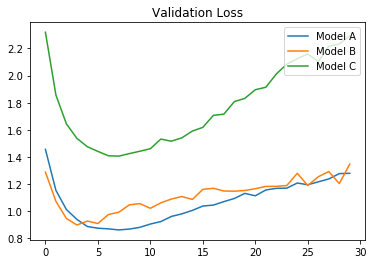

In [45]:
# Plot validation loss curves

# Add your code here

Epoches_list=list(range(0,30))
print(history_A.history['val_loss'])

p1=plt.plot(Epoches_list,history_A.history['val_loss'])
p2= plt.plot(Epoches_list,history_B.history['val_loss'])
p3=plt.plot(Epoches_list,history_C.history['val_loss'])
plt.title("Validation Loss")
plt.legend([p1,p2,p3],labels=['Model A','Model B','Model C'],loc=1)
plt.show()

#one model is significent better than others which can use AUC 

[0.6017289, 0.7737409, 0.84465045, 0.8896267, 0.9135555, 0.92833877, 0.9392383, 0.94650465, 0.9535204, 0.9536457, 0.95489854, 0.95665246, 0.95665246, 0.95828116, 0.9576547, 0.9571536, 0.9592834, 0.95828116, 0.9585317, 0.95940864, 0.96091205, 0.95878226, 0.9575294, 0.9585317, 0.95778, 0.9600351, 0.9597845, 0.9592834, 0.9596592, 0.95953393]
[1.4567742366790772, 1.1548925323486328, 1.01355002784729, 0.9407505106925964, 0.8883220753669738, 0.8758929533958435, 0.8709151191711426, 0.863237151145935, 0.8694606804847718, 0.8823263058662415, 0.9065677099227906, 0.9247127571105958, 0.9624820437431335, 0.9816338829994201, 1.0070099363327025, 1.0391452293395995, 1.0462897453308106, 1.0715337381362915, 1.0948959798812867, 1.1323961038589478, 1.1145852422714233, 1.1575049152374268, 1.1694582118988037, 1.171013388633728, 1.2086730184555055, 1.195940570831299, 1.2174604682922363, 1.2385705099105835, 1.2780507049560548, 1.2801323413848877]


d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


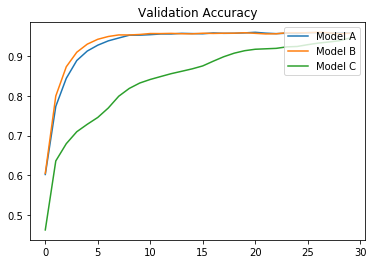

In [47]:
# Plot validation accuracy curves

# Add your code here
print(history_A.history['accuracy'])

Epoches_list=list(range(0,30))
print(history_A.history['val_loss'])

p1=plt.plot(Epoches_list,history_A.history['val_accuracy'])
p2= plt.plot(Epoches_list,history_B.history['accuracy'])
p3=plt.plot(Epoches_list,history_C.history['accuracy'])
plt.title("Validation Accuracy")
plt.legend([p1,p2,p3],labels=['Model A','Model B','Model C'],loc=1)
plt.show()




<br>

<br>

<br>

** <font color="red"> Write your analysis of Task 2 here! ** (Note, this is markdown)

- For each model, from which epoch, overfitting started happening?
For Model B, overfitting started at epoch=4

For Model B1(dropout), overfitting started at epoch = 6

For Model B2(Batch), overfitting started at epoch = 15

For Model B3(L2), overfitting started at epoch = 28

- Which model in general performs better than the others in terms of valiation loss or validation accuracy? 
With respect to valiadion loss, Model B and Model B1 are better.

With repect to validaion accracy, Model B2 is better


- Please explain why this model outperforms the others
For validataion accuracy, batch normalization is absolute better than others, because it readjust to new distribtuion after each layer cacualtion. So you can see, Model B2 rapidly get to optimize accruacy quicker than any others.
</font>



### Task 2: Fight overfitting 
- Let's take **Model B** and try the following strategies to overcome overfitting
    1. Model B1 (**Dropout**): Add a Dropout layer with dropout rate 0.3 **after each hidden layer**
    2. Model B2 (**Batch Normalization**): Add a Batch Normalization layer  after each hidden layer.
    3. Model B3 (**L2 Regularizer**): Add L2 kernel regularization with a coefficient of 0.001 in each hidden layer.
- Train each model as in Task 2 
- Plot validation loss and validation accuracy vs. epoches from the training histories of these four models: B, B1, B2, B3
- Write your analysis (as markdowns) on the following: 
   - Did any of the strategies improve model performance on the validation dataset or on the test dataset
   - For each model, did you still observe overfitting? In this case, which strategy is the most effective in reducing overfitting?

In [48]:
# Define Model B1

# Add your code here



inputs_tensor = layers.Input(shape=(10000,), name="d1_input")
layer_1 = layers.Dense(128, name='d1')(inputs_tensor)
layer_2 = layers.Dropout(0.3)(layer_1)
layer_3 = layers.Dense(64, name='d2')(layer_2)
layer_4 = layers.Dropout(0.3)(layer_3)
outputs_tensor = layers.Dense(46, activation='softmax',name="output")(layer_4)
model_B1 = Model(inputs=inputs_tensor, outputs=outputs_tensor, name='model_B1')
model_B1.summary()

Model: "model_B1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1_input (InputLayer)        (None, 10000)             0         
_________________________________________________________________
d1 (Dense)                   (None, 128)               1280128   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
d2 (Dense)                   (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
output (Dense)               (None, 46)                2990      
Total params: 1,291,374
Trainable params: 1,291,374
Non-trainable params: 0
________________________________________________

In [51]:
# Define Model B2

# Add your code here


inputs_tensor = layers.Input(shape=(10000,), name="d1_input")
layer_1 = layers.Dense(128, name='d1')(inputs_tensor)
layer_2 = layers.BatchNormalization()(layer_1)
layer_3 = layers.Dense(64, name='d2')(layer_2)
layer_4 = layers.BatchNormalization()(layer_3)
outputs_tensor = layers.Dense(46, activation='softmax',name="output")(layer_4)
model_B2 = Model(inputs=inputs_tensor, outputs=outputs_tensor, name='model_B2')
model_B2.summary()

Model: "model_B2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1_input (InputLayer)        (None, 10000)             0         
_________________________________________________________________
d1 (Dense)                   (None, 128)               1280128   
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
d2 (Dense)                   (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
output (Dense)               (None, 46)                2990      
Total params: 1,292,142
Trainable params: 1,291,758
Non-trainable params: 384
______________________________________________

In [61]:
# Define Model B3

# Add your code here


from keras import regularizers
inputs_tensor = layers.Input(shape=(10000,), name="d1_input")
layer_1 = layers.Dense(128,activation='tanh', name='d1',kernel_regularizer=regularizers.l2(0.001))(inputs_tensor)
layer_2 = layers.Dense(64,activation='tanh', name='d2',kernel_regularizer=regularizers.l2(0.001))(layer_1)
outputs_tensor = layers.Dense(46, activation='softmax',name="output")(layer_2)
model_B3 = Model(inputs=inputs_tensor, outputs=outputs_tensor, name='model_B3')
model_B3.summary()

Model: "model_B3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1_input (InputLayer)        (None, 10000)             0         
_________________________________________________________________
d1 (Dense)                   (None, 128)               1280128   
_________________________________________________________________
d2 (Dense)                   (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 46)                2990      
Total params: 1,291,374
Trainable params: 1,291,374
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Fit Model B1

# Add your code here

history_B1 = fit_model(model_B1, X_train, Y_train, X_val, Y_val, x_test, one_hot_test_labels)

Loading data..
7982 train sequences
2246 test sequences
Vectorizing sequence data...
x_train shape: (7982, 10000)
x_test shape: (2246, 10000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (7982, 46)
y_test shape: (2246, 46)
Train on 7982 samples, validate on 1000 samples
Epoch 1/30
7982/7982 [==============================] - 2s 194us/step - loss: 2.0653 - accuracy: 0.5755 - val_loss: 1.3588 - val_accuracy: 0.6940
Epoch 2/30
7982/7982 [==============================] - 1s 155us/step - loss: 1.1549 - accuracy: 0.7566 - val_loss: 1.1316 - val_accuracy: 0.7450
Epoch 3/30
7982/7982 [==============================] - 1s 160us/step - loss: 0.8509 - accuracy: 0.8282 - val_loss: 1.0125 - val_accuracy: 0.7790
Epoch 4/30
7982/7982 [==============================] - 1s 160us/step - loss: 0.6525 - accuracy: 0.8707 - val_loss: 0.9731 - val_accuracy: 0.7910
Epoch 5/30
7982/7982 [==============================] - 1s 157us/step - loss: 0.5061 - accu

In [52]:
# Fit Model B2

# Add your code here

history_B2 = fit_model(model_B2, X_train, Y_train, X_val, Y_val, x_test, one_hot_test_labels)

Loading data..
7982 train sequences
2246 test sequences
Vectorizing sequence data...
x_train shape: (7982, 10000)
x_test shape: (2246, 10000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (7982, 46)
y_test shape: (2246, 46)
Train on 7982 samples, validate on 1000 samples
Epoch 1/30
7982/7982 [==============================] - 2s 229us/step - loss: 1.7433 - accuracy: 0.6880 - val_loss: 2.8884 - val_accuracy: 0.7860
Epoch 2/30
7982/7982 [==============================] - 1s 160us/step - loss: 0.6567 - accuracy: 0.9083 - val_loss: 2.7884 - val_accuracy: 0.7990
Epoch 3/30
7982/7982 [==============================] - 1s 160us/step - loss: 0.4191 - accuracy: 0.9385 - val_loss: 2.6341 - val_accuracy: 0.7950
Epoch 4/30
7982/7982 [==============================] - 1s 160us/step - loss: 0.3228 - accuracy: 0.9484 - val_loss: 2.4074 - val_accuracy: 0.7960
Epoch 5/30
7982/7982 [==============================] - 1s 161us/step - loss: 0.2724 - accu

In [62]:
# Fit Model B3

# Add your code here

history_B3 = fit_model(model_B3, X_train, Y_train, X_val, Y_val, x_test, one_hot_test_labels)

Loading data..
7982 train sequences
2246 test sequences
Vectorizing sequence data...
x_train shape: (7982, 10000)
x_test shape: (2246, 10000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (7982, 46)
y_test shape: (2246, 46)
Train on 7982 samples, validate on 1000 samples
Epoch 1/30
7982/7982 [==============================] - 2s 272us/step - loss: 2.3542 - accuracy: 0.5838 - val_loss: 1.6773 - val_accuracy: 0.7010
Epoch 2/30
7982/7982 [==============================] - 1s 181us/step - loss: 1.3702 - accuracy: 0.7739 - val_loss: 1.3882 - val_accuracy: 0.7580
Epoch 3/30
7982/7982 [==============================] - 1s 187us/step - loss: 1.0871 - accuracy: 0.8385 - val_loss: 1.2711 - val_accuracy: 0.7820
Epoch 4/30
7982/7982 [==============================] - 1s 183us/step - loss: 0.9084 - accuracy: 0.8772 - val_loss: 1.2056 - val_accuracy: 0.7930
Epoch 5/30
7982/7982 [==============================] - 1s 188us/step - loss: 0.7903 - accu

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


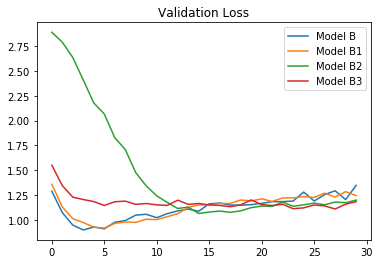

In [57]:
# Plot validation loss curves

# Add your code here



Epoches_list=list(range(0,30))

p1=plt.plot(Epoches_list,history_B.history['val_loss'])
p2=plt.plot(Epoches_list,history_B1.history['val_loss'])
p3=plt.plot(Epoches_list,history_B2.history['val_loss'])
p4=plt.plot(Epoches_list,history_B3.history['val_loss'])
plt.title("Validation Loss")
plt.legend([p1,p2,p3,p4],labels=['Model B','Model B1','Model B2','Model B3'],loc=1)
plt.show()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if sys.path[0] == '':


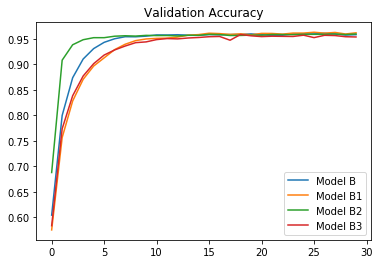

In [63]:
# Plot validation accuracy curves

# Add your code here

Epoches_list=list(range(0,30))

p1=plt.plot(Epoches_list,history_B.history['accuracy'])
p2=plt.plot(Epoches_list,history_B1.history['accuracy'])
p3=plt.plot(Epoches_list,history_B2.history['accuracy'])
p4=plt.plot(Epoches_list,history_B3.history['accuracy'])
plt.title("Validation Accuracy")
plt.legend([p1,p2,p3,p4],labels=['Model B','Model B1','Model B2','Model B3'],loc=0)
plt.show()

** <font color="red"> Write your analysis of Task 2 here! ** (Note, this is markdown)

   - Did any of the strategies improve model performance on the validation dataset or on the test dataset
   Batch normlization improve the validation accuracy. Dropout improve slightly but not sigificant.
   
   - For each model, did you still observe overfitting? In this case, which strategy is the most effective in reducing overfitting?
   Overfitting is still exist but much better then orignial. Dropout maybe the most effective in reducing overfitting 
   </font>

<br>

<br>

<br>

<br>

<br>

<br>

### Task 3: Experiment with different optimizers 
- Again, let's take **Model B1** and try different optimizers
    1. B1: as in Task 2, train model B1 using RMSProp optimizer
    2. B1(i): train model B1 using **Adam with the defualt learning rate 0.001**)
    3. B1(ii): train model B1 using **Adam with smaller learning rate 0.0005 **
- Define a function **fit_model_with_optimizer** as follows:
    - It takes training, validation, and test datasets as inputs, as in Task1
    - It has an additional parameter, optimizer, denoted as opt
    - It first define Model B1 as in Task 2
    - Then it complies the model with the provided opt. The rest of compiling and fitting is similar to the fit_model function you defined in Task 1.
- Train Model B1 with different optimizers. 
- Plot validation loss and validation accuracy vs. epoches from the training histories of these four models: B1, B1(i), and B2(ii)

<font color=red>
- Did any of the strategies improve model performance on the validation dataset or on the test dataset? Write your analysis (as markdowns)
    Comparing to the result, theoretically <code>Adam</code> with appropirate learning rate is the best, but i can't see that much different in my result. <code>Adam</code> with <code>learning rate=0.0005</code> is much better in validation loss at long time iteration. Maybe it is not so economical for large data considering extra computaion time. And Adam with learning rate=0.0005 is two slow at validation accuray.

- Note, due to randomness, you may observe slightly different results in each round. You just need to analyze based on one round of the results you obtained.
</font>

In [195]:
# Define three optimizer

 # Write your code here
from keras import optimizers
from keras.optimizers import Adam 

opt_1=RMSprop(learning_rate=0.001, rho=0.9)
opt_2=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
opt_3=Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)

"""
def optimizors(i):
    if i== 0:
        opt = optimizers.RMSprop(0.01)
    elif i==1:
        opt= optimizers.Adam(0.01)
    elif i==2:
        opt= optimizers.Adam(0.005)
    return opt 


def _get_optimizer(x):
    
    Define optimizer for the neural net.
 
    if x=='adam':
        optimizer = Adam(lr=self.learning_rate,decay=self.learning_rate_decay)
    elif self.optimizer_type=='sgd':
            optimizer = SGD(lr=self.learning_rate, momentum=0.0, decay=self.learning_rate_decay, nesterov=False)
    elif self.optimizer_type=='rmsprop':
            optimizer = RMSprop(lr=self.learning_rate, rho=0.9, epsilon=1e-08, decay=self.learning_rate_decay)
    return optimizer
"""

"\ndef optimizors(i):\n    if i== 0:\n        opt = optimizers.RMSprop(0.01)\n    elif i==1:\n        opt= optimizers.Adam(0.01)\n    elif i==2:\n        opt= optimizers.Adam(0.005)\n    return opt \n\n\ndef _get_optimizer(x):\n    \n    Define optimizer for the neural net.\n \n    if x=='adam':\n        optimizer = Adam(lr=self.learning_rate,decay=self.learning_rate_decay)\n    elif self.optimizer_type=='sgd':\n            optimizer = SGD(lr=self.learning_rate, momentum=0.0, decay=self.learning_rate_decay, nesterov=False)\n    elif self.optimizer_type=='rmsprop':\n            optimizer = RMSprop(lr=self.learning_rate, rho=0.9, epsilon=1e-08, decay=self.learning_rate_decay)\n    return optimizer\n"

In [196]:
print(opt_1)
print(opt_2)
print(opt_3)

In [197]:
# define fit_model_with_optimizer function
def fit_model_with_optimizer(x_train, y_train, x_val, y_val, x_test, y_test, opt):
    
    history = None

    # Write your code here as follows:
    
    # first define Model B1
    inputs_tensor = layers.Input(shape=(10000,), name="d1_input")
    layer_1 = layers.Dense(128,activation='relu',name='d1')(inputs_tensor)
    layer_2 = layers.Dropout(0.3)(layer_1)
    layer_3 = layers.Dense(64, activation='relu',name='d2')(layer_2)
    layer_4 = layers.Dropout(0.3)(layer_3)
    outputs_tensor = layers.Dense(46, activation='softmax',name="output")(layer_4)
    model_B1 = Model(inputs=inputs_tensor, outputs=outputs_tensor, name=('model_B1'+str(opt)))
    model_B1.summary()
   
    
    # Then compile the model with the optimizer passed as a parameter
    model_B1.compile(loss='categorical_crossentropy',
                  optimizer= opt,
                  metrics=['accuracy'])
    print(opt)
    
    # Finally Train the model
    history = model_B1.fit(x_train, y_train, validation_data = (x_val, y_val),
                    batch_size=512,
                    epochs=30,
                    verbose=1
                    )
    score = model_B1.evaluate(x_test, y_test,
                       batch_size=512, verbose=1)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    return history

In [194]:
# Train model B1 with RMSProp optimizer

# Write your code here 

history_B1_1 = fit_model_with_optimizer(X_train, Y_train, X_val, Y_val, x_test, one_hot_test_labels, opt_1)

Model: "model_B1<keras.optimizers.RMSprop object at 0x00000291E0A19F28>"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1_input (InputLayer)        (None, 10000)             0         
_________________________________________________________________
d1 (Dense)                   (None, 128)               1280128   
_________________________________________________________________
dropout_63 (Dropout)         (None, 128)               0         
_________________________________________________________________
d2 (Dense)                   (None, 64)                8256      
_________________________________________________________________
dropout_64 (Dropout)         (None, 64)                0         
_________________________________________________________________
output (Dense)               (None, 46)                2990      
Total params: 1,291,374
Trainable params: 1,291,374
Non-trainable par

In [198]:
# Train model B1 with Adam optimizer with different learning rate

# Write your code here 
history_B1_2 = fit_model_with_optimizer(X_train, Y_train, X_val, Y_val, x_test, one_hot_test_labels, opt_2)

Model: "model_B1<keras.optimizers.Adam object at 0x00000291E308A860>"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1_input (InputLayer)        (None, 10000)             0         
_________________________________________________________________
d1 (Dense)                   (None, 128)               1280128   
_________________________________________________________________
dropout_65 (Dropout)         (None, 128)               0         
_________________________________________________________________
d2 (Dense)                   (None, 64)                8256      
_________________________________________________________________
dropout_66 (Dropout)         (None, 64)                0         
_________________________________________________________________
output (Dense)               (None, 46)                2990      
Total params: 1,291,374
Trainable params: 1,291,374
Non-trainable params

In [199]:
# Train model B1 with Adam optimizer with smaller learning rate

# Write your code here 
history_B1_3 = fit_model_with_optimizer(X_train, Y_train, X_val, Y_val, x_test, one_hot_test_labels, opt_3)


Model: "model_B1<keras.optimizers.Adam object at 0x00000291E1F97FD0>"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1_input (InputLayer)        (None, 10000)             0         
_________________________________________________________________
d1 (Dense)                   (None, 128)               1280128   
_________________________________________________________________
dropout_67 (Dropout)         (None, 128)               0         
_________________________________________________________________
d2 (Dense)                   (None, 64)                8256      
_________________________________________________________________
dropout_68 (Dropout)         (None, 64)                0         
_________________________________________________________________
output (Dense)               (None, 46)                2990      
Total params: 1,291,374
Trainable params: 1,291,374
Non-trainable params

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # This is added back by InteractiveShellApp.init_path()


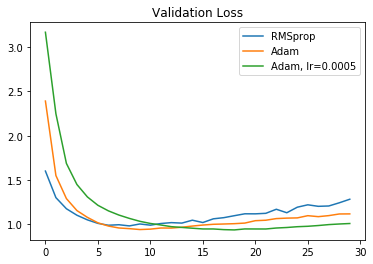

In [200]:
# Plot loss curves

# Write your code here 

Epoches_list=list(range(0,30))

p1=plt.plot(Epoches_list, history_B1_1.history['val_loss'])
p2=plt.plot(Epoches_list, history_B1_2.history['val_loss'])
p3=plt.plot(Epoches_list, history_B1_3.history['val_loss'])
plt.title("Validation Loss")
plt.legend([p1,p2,p3],labels=['RMSprop','Adam','Adam, Ir=0.0005'],loc=1)
plt.show()



d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if sys.path[0] == '':


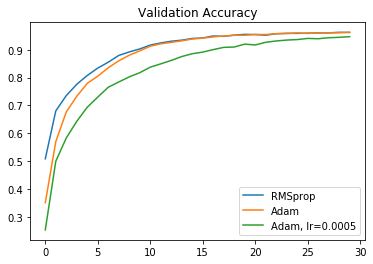

In [201]:
# Plot accuracy curves

# Write your code here 


Epoches_list=list(range(0,30))

p1=plt.plot(Epoches_list,history_B1_1.history['accuracy'])
p2=plt.plot(Epoches_list,history_B1_2.history['accuracy'])
p3=plt.plot(Epoches_list,history_B1_3.history['accuracy'])
plt.title("Validation Accuracy")
plt.legend([p1,p2,p3],labels=['RMSprop','Adam','Adam, Ir=0.0005'],loc=0)
plt.show()



** <font color="red"> Write your analysis of Task 2 here! </font>** (Note, this is markdown)

- Did any of the strategies improve model performance on the validation dataset or on the test dataset? 

If we ignore time, Adam with smaller learning rate is better

** GOOD LUCK! **